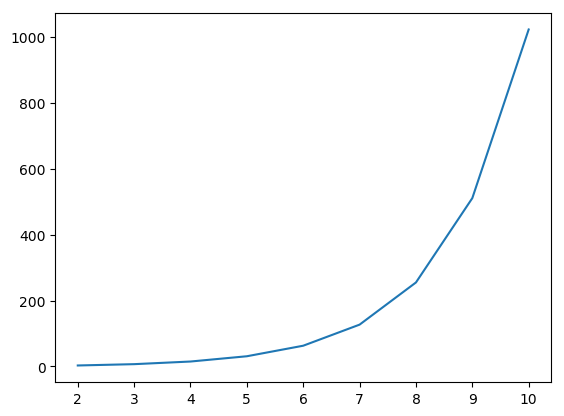

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.reset_defaults()
from scipy import special

plt.plot(range(2,11),[sum(special.binom(k,1+j) for j in range(k)) for k in range(2,11)])

## make_classification

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from secoc import estimator; reload(estimator)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

X,y = make_classification(n_classes=3, n_clusters_per_class=1)

X_train = np.load("/home/fede/projects_local/secoc/data/X_train.npy")
X_test = np.load("/home/fede/projects_local/secoc/data/X_test.npy")
y_test = np.load("/home/fede/projects_local/secoc/data/y_test.npy")
y_train = np.load("/home/fede/projects_local/secoc/data/y_train.npy")

In [2]:
y_tr = np.where(y_train)[1]

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

train_index, _ = next(StratifiedShuffleSplit(n_splits=1, train_size=1000).split(X_train, y_train))

X_train_small = X_train[train_index]
y_train_small = y_tr[train_index]
# X_train_small = X_train
# y_train_small = y_tr

In [21]:
reload(estimator)
from sklearn.tree import DecisionTreeClassifier
est = estimator.SlidingECOC(LogisticRegression(), n_estimators=50, window_size=1000, stride=500, verbose=1).fit(
    X_train_small, y_train_small)
encoding = est.encode(X_train_small)

You are about to generate 50 estimators for 17 windows, for a total of 850 estimators.


KeyboardInterrupt: 

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

y_pred = est.predict(X_test, classifier=KNeighborsClassifier(metric='hamming'))

In [32]:
accuracy_score(np.where(y_test)[1], y_pred)

0.93840000000000001

In [38]:
import numpy as np

sorted(range(0, 10, 2) * 3)

[0, 0, 0, 2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8]

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=850).fit(X_train_small, y_train_small)

In [23]:
rfc.score(X_test, np.where(y_test)[1])

0.94479999999999997

In [105]:
from sklearn.manifold import TSNE
def visualise(X, y, title=''):
    tr = TSNE(n_components=2).fit_transform(X)
    for i in np.unique(y):
        plt.plot(tr[y == i,0],tr[y == i,1], 'o', label=i)
        
    plt.legend(bbox_to_anchor=(0., -.252, 1., .102), loc='lower center',
           ncol=5, mode="expand", borderaxespad=0.)
    plt.title(title)
    plt.show()

In [106]:
encoding.shape

(60000, 1700)

In [ ]:
visualise(encoding, y_train_small, "encoding")

In [ ]:
visualise(X_train_small, y_train_small, "CNN features")

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def visualise_lda(X, y):
    tr = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
    for i in np.unique(y):
        plt.plot(tr[y == i,0],tr[y == i,1], 'o', label=i)
        
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)
    plt.show()

/home/fede/miniconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


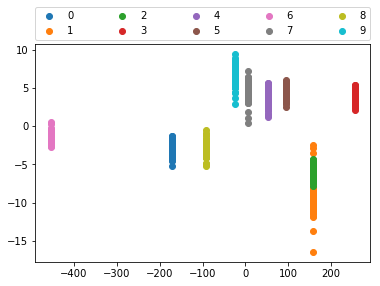

In [48]:
visualise_lda(X_train_small, y_train_small)

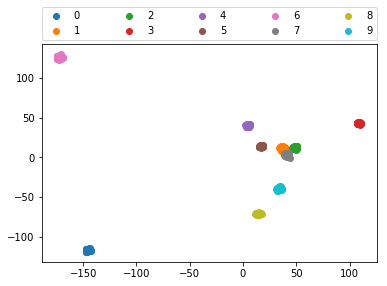

In [49]:
visualise_lda(encoding, y_train_small)